In [47]:
import tensorflow as tf  
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [48]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols = train_features.shape
num_test, _, _, _ = test_features.shape
num_classes = len(np.unique(train_labels))


## Into categorical

In [69]:
import keras 
train_labels = keras.utils.to_categorical(train_labels,10)
test_labels = keras.utils.to_categorical(test_labels,10)

# http://parneetk.github.io/blog/cnn-cifar10/

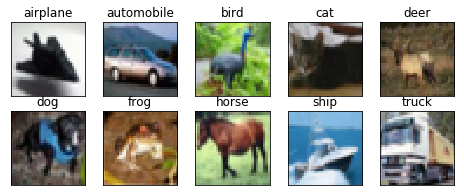

In [6]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx[0],::]
    ax.set_title(class_names[i])
    plt.imshow(features_idx)
plt.show()

In [7]:
train_features.shape

(50000, 32, 32, 3)

In [8]:
train_labels.shape
train_labels[0,0]


6

# functions

In [49]:
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

In [35]:
 # def next_batch(self, batch_size, fake_data=False):
 #    """Return the next `batch_size` examples from this data set."""
 #    if fake_data:
 #      fake_image = [1] * 784
 #      if self.one_hot:
 #        fake_label = [1] + [0] * 9
 #      else:
 #        fake_label = 0
 #      return [fake_image for _ in xrange(batch_size)], [
 #          fake_label for _ in xrange(batch_size)
 #      ]
 #    start = self._index_in_epoch
 #    self._index_in_epoch += batch_size
 #    if self._index_in_epoch > self._num_examples: # epoch中的句子下标是否大于所有语料的个数，如果为True,开始新一轮的遍历
 #      # Finished epoch
 #      self._epochs_completed += 1
 #      # Shuffle the data
 #      perm = numpy.arange(self._num_examples) # arange函数用于创建等差数组
 #      numpy.random.shuffle(perm)  # 打乱
 #      self._images = self._images[perm]
 #      self._labels = self._labels[perm]
 #      # Start next epoch
 #      start = 0
 #      self._index_in_epoch = batch_size
 #      assert batch_size <= self._num_examples
 #    end = self._index_in_epoch
 #    return self._images[start:end], self._labels[start:end]

In [50]:

def add_layer(inputs, in_size, out_size, activation_function=None,):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1,)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b,)
    return outputs

In [70]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    # stride [1, x_movement, y_movement, 1]
    # Must have strides[0] = strides[3] = 1
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    # stride [1, x_movement, y_movement, 1]
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 32,32,3])
ys = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 32, 32, 3])
# print(x_image.shape)  # [n_samples, 32,32,3]

In [71]:
## conv1 layer ##
W_conv1 = weight_variable([5,5, 3,32]) 
# patch 5x5, in size 3, out size 32
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) 
# output size 32x32x32
h_pool1 = max_pool_2x2(h_conv1)                                         # output size 14x14x32
# output size 16x16x32

## conv2 layer ##
W_conv2 = weight_variable([5,5, 32, 64])
# patch 5x5, in size 32, out size 64
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) 
#output size 16x16x64
h_pool2 = max_pool_2x2(h_conv2) 
# output size 8x8x64

## fc1 layer ##
W_fc1 = weight_variable([8*8*64, 1024])
b_fc1 = bias_variable([1024]) 
# [n_samples, 8, 8, 64] ->> [n_samples, 7*7*64]
h_pool2_flat = tf.reshape(h_pool2, [-1, 8*8*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## fc2 layer ##
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)




In [75]:
# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.AdamOptimizer(0.5).minimize(cross_entropy)

sess = tf.Session()
# important step
init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    index = np.random.choice(range(len(train_features)),500)
    batch_xs = train_features[index,::]
    batch_ys = train_labels[index,::]
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    if i % 50 == 0:
        print(compute_accuracy(
            train_features[:1000], train_labels[:1000]))

0.102


0.102


0.102


0.102


0.102


0.102


KeyboardInterrupt: 

In [36]:
index = np.random.choice(range(len(train_features)),2)
batch_xs = train_features[index,::]
batch_ys = train_labels[index,::]

In [39]:
print(index)
print(batch_xs)

[20936  5600] [[[[169 181 195]
   [167 179 193]
   [167 179 193]
   ..., 
   [161 176 189]
   [160 175 188]
   [160 176 189]]

  [[167 179 193]
   [165 177 191]
   [165 177 191]
   ..., 
   [158 176 188]
   [157 175 187]
   [158 176 188]]

  [[168 180 194]
   [165 177 191]
   [165 177 191]
   ..., 
   [156 177 188]
   [155 176 187]
   [157 178 189]]

  ..., 
  [[212 220 223]
   [205 218 217]
   [199 209 208]
   ..., 
   [140 133 132]
   [140 156 154]
   [168 186 187]]

  [[205 210 214]
   [200 211 215]
   [193 209 212]
   ..., 
   [175 196 192]
   [185 204 200]
   [209 220 223]]

  [[210 214 219]
   [204 213 219]
   [204 217 221]
   ..., 
   [163 188 184]
   [186 197 192]
   [202 208 209]]]


 [[[133 170 216]
   [133 170 216]
   [133 170 216]
   ..., 
   [125 169 212]
   [125 169 212]
   [124 168 211]]

  [[135 172 217]
   [135 172 217]
   [135 172 217]
   ..., 
   [127 169 212]
   [127 169 212]
   [127 168 212]]

  [[138 173 218]
   [138 173 218]
   [138 173 218]
   ..., 
   [130 169 

In [17]:
np.rand(range(5))

AttributeError: module 'numpy' has no attribute 'rand'

In [18]:
np.random_sample

AttributeError: module 'numpy' has no attribute 'random_sample'

In [19]:
np.beta

AttributeError: module 'numpy' has no attribute 'beta'

In [21]:
np.random.rand(1,2,3)

array([[[ 0.63590959,  0.00680209,  0.63651649],
        [ 0.10046567,  0.74611195,  0.16945109]]])

In [33]:
np.random.choice(range(10),2)

array([6, 5])